In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # for deprecated matplotlib functions

In [75]:
# load the data
data = pd.read_csv('data/heart.csv')
# display the raw data that is inside heart.csv
display(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [76]:
# # Make Data Readable
# data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
#                 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']


# data['sex'][data['sex'] == 0] = 'female'
# data['sex'][data['sex'] == 1] = 'male'

# data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
# data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
# data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
# data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

# data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/dl'
# data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/dl'

# data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
# data['rest_ecg'][data['rest_ecg'] == 1] = 'having ST-T wave abnormality'
# data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

# data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
# data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

# data['st_slope'][data['st_slope'] == 1] = 'upsloping'
# data['st_slope'][data['st_slope'] == 2] = 'flat'
# data['st_slope'][data['st_slope'] == 3] = 'downsloping'

# data['thalassemia'][data['thalassemia'] == 1] = 'normal'
# data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
# data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

# # display cleaned columns
# display(data) 

In [77]:
datasets = [['Cleveland', 303, 76, 14], 
            ['Hungarian', 294, 76, 14],
            ['Switzerland', 123, 76, 14],
            ['Long Beach', 200, 76, 14]]
df = pd.DataFrame(datasets, columns=['Database', '# of instances', '# of raw attributes', '# of used attributes'])
display(df)

,Database,# of instances,# of raw attributes,# of used attributes
0,Cleveland,303,76,14
1,Hungarian,294,76,14
2,Switzerland,123,76,14
3,Long Beach,200,76,14


In [78]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

datanames = {'Attribute Name':[
'Age',
'Sex', 
'Chest Pain Type (cp)',
'Resting blood pressure (trestbps)',
'Serum Cholesterol (chol)',
'Fasting Blood Pressure > 120 mg/dl (fbs)',
'Resting Electrocardiographic Result (restecg)',
'Maximum Heart Rate Achieved (thalach)',
'Exercise Induced Angina (exang)',
'Oldpeak (oldpeak)',
'Slope of Peak Exercise ST segment (slope)',
'Number of Major Vessels Colored by Fluoroscopy (ca)',
'Thal (thal)',
'Predicted Attribute (num)'],
             'Attribute Description':[
'Measured in years',
'0 = female, \
1 = male',
'1 = typical angina, \
2 = atypical angina, \
3 = non-anginal pain, \
4 = asymptomatic',
'Measured in mm Hg on admission to the hospital',
'Measured in mg/dl',
'0 = false, \
1 = true',
'0 = normal, \
1 = having ST-T, \
2 = Hypertrophy',
'Measured in beats per minute (bpm)',
'0 = no, \
1 = yes',
'ST depression induced by exercise relative to rest',
'1 = upsloping, \
2 = flat, \
3 = downsloping',
'0-3',
'3(1) = normal, \
6(2) = fixed defect, \
7(3) = reversible fluoroscopy',
'0 = <50% diameter narrowing, \
1 = >50% diameter narrowing'],
             'Raw Attribute #':[
3,
4,
9,
10,
12,
16,
19,
32,
38,
40,
41,
44,
51,
58]}
# df = pd.DataFrame(datanamdatasets = [['Cleveland', 303, 76, 14], 
#             ['Hungarian', 294, 76, 14],
#             ['Switzerland', 123, 76, 14],
#             ['Long Beach', 200, 76, 14]]
df = pd.DataFrame(datasets, columns=['Database', '# of instances', '# of raw attributes', '# of used attributes'])
display(df)
# display(df)

,Database,# of instances,# of raw attributes,# of used attributes
0,Cleveland,303,76,14
1,Hungarian,294,76,14
2,Switzerland,123,76,14
3,Long Beach,200,76,14


In [79]:
datasets = [['Kaggle Heart Disease UCI'],
            ['Various Kernels available from different creators that explore this Heart Disease UCI dataset']]

df = pd.DataFrame(datasets, columns=['Publicly-Available Code'])
display(df)

,Publicly-Available Code
0,Kaggle Heart Disease UCI
1,Various Kernels available from different creators that explore this Heart Disease UCI dataset


In [80]:
datasets = [['K-Nearest Neighbors'],
            ['Random Forests'],
            ['Naive Bayes'],
            ['Neural Networks'],
            ['Blend/Stacked Model Ensemble']]

df = pd.DataFrame(datasets, columns=['Team Code'])
display(df)

,Team Code
0,K-Nearest Neighbors
1,Random Forests
2,Naive Bayes
3,Neural Networks
4,Blend/Stacked Model Ensemble


In [81]:
X = data.drop(['target'], axis=1)
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)

print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (242, 13)
X_test: (61, 13)
y_train: (242,)
y_test: (61,)


# K-Nearest Neighbor

In [82]:
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', 
                           algorithm='auto', leaf_size=30, p=1, 
                           metric='minkowski',metric_params=None,
                          n_jobs=-1)

knn.fit(X_train, y_train)
# fit the model using X as training data and Y as target values

y_validation_hat = knn.predict_proba(X_test)[:,1]

# roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None, max_fpr=None)
knn_classifier_roc = roc_auc_score(y_test, y_validation_hat, average='macro', sample_weight=None)
print("roc auc:", knn_classifier_roc)
print("train_score:", knn.score(X_train, y_train))
print("test_score:", knn.score(X_test, y_test))

print("training error:", 1 - knn.score(X_train, y_train))
print("validation error:", 1 - knn.score(X_test, y_test))
# returns the mean accuracy on the given test data and labels

roc auc: 0.8685344827586206
train_score: 0.6859504132231405
test_score: 0.7704918032786885
training error: 0.31404958677685946
validation error: 0.2295081967213115


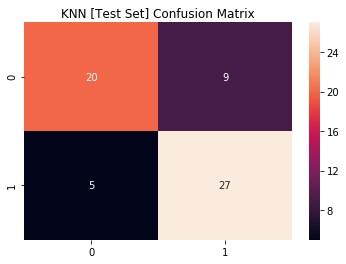

In [95]:
knn_y_true = y_test
knn_y_pred = knn.predict(X_test)
knn_matrix = confusion_matrix(knn_y_true, knn_y_pred)

plt.title("KNN [Test Set] Confusion Matrix", loc='center')
sns.heatmap(pd.DataFrame(knn_matrix), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True, fmt='d', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.show()

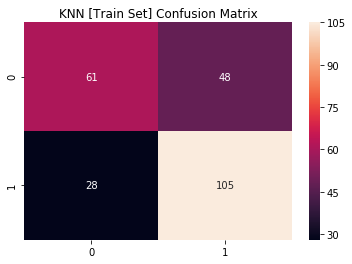

In [94]:
knn_y_true = y_train
knn_y_pred = knn.predict(X_train)
knn_matrix = confusion_matrix(knn_y_true, knn_y_pred)

plt.title("KNN [Train Set] Confusion Matrix", loc='center')
sns.heatmap(pd.DataFrame(knn_matrix), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True, fmt='d', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.show()

In [16]:
# Hyperparameter tuning
knn_clf = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [5, 10, 15, 20],
                'weights': ['uniform', 'distance'],
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                 'leaf_size': [30, 40, 50, 60]}

knn_search = GridSearchCV(knn_clf, param_grid=knn_param_grid, cv=3, scoring='accuracy', verbose=20, n_jobs=-1)
#rfc = RandomizedSearchCV(rf, param_distributions = rfc_param_grid, n_iter = 100, cv = 3, scoring='accuracy', verbose=20, random_state=42, n_jobs = -1)
knn_search.fit(X_train, y_train)
best_knn = knn_search.best_estimator_
print(best_knn)
print(knn_search.best_score_)
print(knn_search.best_params_)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')
0.6487603305785123
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 15, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    5.4s finished


# Random Forest

In [19]:
rforest = RandomForestClassifier(n_estimators=100, 
                                 criterion='entropy', max_depth=90, 
                                 min_samples_split=2, 
                                 min_samples_leaf=5, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_features='sqrt', 
                                 max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, 
                                 min_impurity_split=None, 
                                 bootstrap=True, oob_score=True, 
                                 n_jobs=-1, random_state=None, 
                                 verbose=0, warm_start=False, 
                                 class_weight=None)

rforest.fit(X_train, y_train)
# fit the model using X as training data and Y as target values

y_validation_hat = rforest.predict_proba(X_test)[:,1]

# roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None, max_fpr=None)
rforest_classifier_roc = roc_auc_score(y_test, y_validation_hat, average='macro', sample_weight=None)
print("roc auc:", rforest_classifier_roc)
print("train_score:", rforest.score(X_train, y_train))
print("test_score:", rforest.score(X_test, y_test))

print("training error:", 1 - rforest.score(X_train, y_train))
print("validation error:", 1 - rforest.score(X_test, y_test))
# returns the mean accuracy on the given test data and labels

roc auc: 0.9364224137931034
train_score: 0.9173553719008265
test_score: 0.8688524590163934
training error: 0.0826446280991735
validation error: 0.1311475409836066


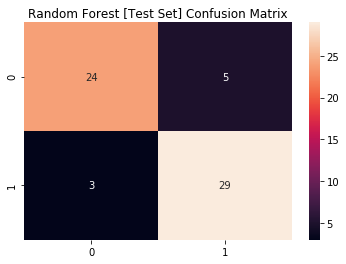

In [103]:
rforest_y_true = y_test
rforest_y_pred = rforest.predict(X_test)
rforest_matrix = confusion_matrix(rforest_y_true, rforest_y_pred)

plt.title("Random Forest [Test Set] Confusion Matrix", loc='center')
sns.heatmap(pd.DataFrame(rforest_matrix), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True, fmt='d', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.show()

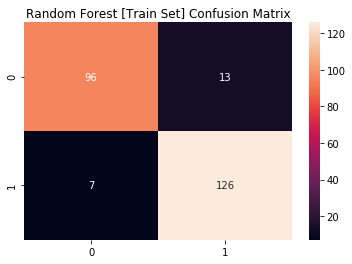

In [97]:
rforest_y_true = y_train
rforest_y_pred = rforest.predict(X_train)
rforest_matrix = confusion_matrix(rforest_y_true, rforest_y_pred)

plt.title("Random Forest [Train Set] Confusion Matrix", loc='center')
sns.heatmap(pd.DataFrame(rforest_matrix), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True, fmt='d', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.show()

In [24]:
# Hyperparameter tuning
rforest_clf = RandomForestClassifier()
rforest_param_grid = {'n_estimators': [100, 200, 300, 400, 500],
                 'criterion': ['gini', 'entropy'],
                 'max_depth': [90, 100],
                 'min_samples_split': [2, 4, 8],
                 'min_samples_leaf': [4, 5],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'bootstrap': ['True', 'False']}

rforest_search = GridSearchCV(rforest_clf, param_grid=rforest_param_grid, cv=3, scoring='accuracy', verbose=20, n_jobs=-1)
#rfc = RandomizedSearchCV(rf, param_distributions = rfc_param_grid, n_iter = 100, cv = 3, scoring='accuracy', verbose=20, random_state=42, n_jobs = -1)
rforest_search.fit(X_train, y_train)
best_rforest = rforest_search.best_estimator_
print(best_rforest)
print(rforest_search.best_score_)
print(rforest_search.best_params_)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

RandomForestClassifier(bootstrap='True', class_weight=None, criterion='entropy',
                       max_depth=90, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8347107438016529
{'bootstrap': 'True', 'criterion': 'entropy', 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  2.6min finished


# Decision Tree

In [20]:
dtree = DecisionTreeClassifier(criterion='gini', splitter='best', 
                               max_depth=25, min_samples_split=2**6, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, 
                               max_features=6, random_state=None, 
                               max_leaf_nodes=None, 
                               min_impurity_decrease=0.0, 
                               min_impurity_split=None, 
                               class_weight='balanced', presort=False)

dtree.fit(X_train, y_train)
# fit the model using X as training data and Y as target values
y_validation_hat = dtree.predict_proba(X_test)[:,1]

# roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None, max_fpr=None)
dtree_classifier_roc = roc_auc_score(y_test, y_validation_hat, average='macro', sample_weight=None)
print("roc auc:", dtree_classifier_roc)
print("train_score:", dtree.score(X_train, y_train))
print("test_score:", dtree.score(X_test, y_test))

print("training error:", 1 - dtree.score(X_train, y_train))
print("validation error:", 1 - dtree.score(X_test, y_test))
# returns the mean accuracy on the given test data and labels

roc auc: 0.8890086206896552
train_score: 0.768595041322314
test_score: 0.7868852459016393
training error: 0.23140495867768596
validation error: 0.21311475409836067


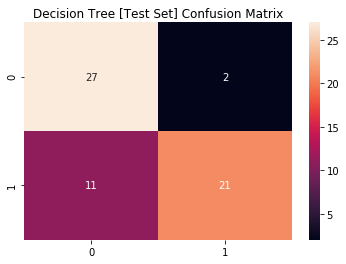

In [98]:
dtree_y_true = y_test
dtree_y_pred = dtree.predict(X_test)
dtree_matrix = confusion_matrix(dtree_y_true, dtree_y_pred)

plt.title("Decision Tree [Test Set] Confusion Matrix", loc='center')
sns.heatmap(pd.DataFrame(dtree_matrix), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True, fmt='d', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.show()

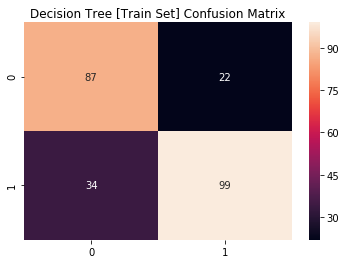

In [100]:
dtree_y_true = y_train
dtree_y_pred = dtree.predict(X_train)
dtree_matrix = confusion_matrix(dtree_y_true, dtree_y_pred)

plt.title("Decision Tree [Train Set] Confusion Matrix", loc='center')
sns.heatmap(pd.DataFrame(dtree_matrix), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True, fmt='d', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.show()

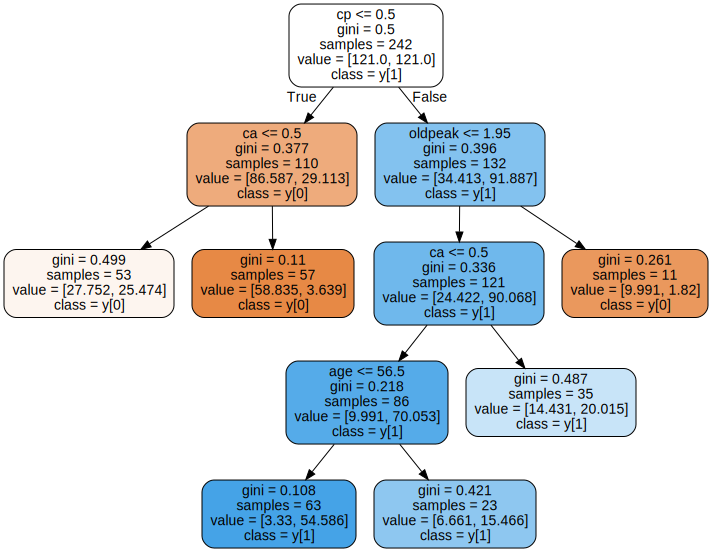

In [32]:
dot_data = tree.export_graphviz(dtree, feature_names=data.columns[:-1],  
                                out_file=None, class_names=True,
                                filled=True, rounded=True)  
graphviz.Source(dot_data)

# Neural Network

In [41]:
nn = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', 
                   solver='adam', alpha=0.0001, batch_size='auto', 
                   learning_rate='constant', learning_rate_init=0.001, 
                   power_t=0.5, max_iter=200, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, 
                   warm_start=False, momentum=0.9, 
                   nesterovs_momentum=True, early_stopping=False, 
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                   epsilon=1e-08, n_iter_no_change=10)

nn.fit(X_train, y_train)
# fit the model using X as training data and Y as target values
y_validation_hat = nn.predict_proba(X_test)[:,1]

# roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None, max_fpr=None)
nn_classifier_roc = roc_auc_score(y_test, y_validation_hat, average='macro', sample_weight=None)
print("roc auc:", nn_classifier_roc)
print("train_score:", nn.score(X_train, y_train))
print("test_score:", nn.score(X_test, y_test))

print("training error:", 1 - nn.score(X_train, y_train))
print("validation error:", 1 - nn.score(X_test, y_test))
# returns the mean accuracy on the given test data and labels

roc auc: 0.9073275862068966
train_score: 0.8347107438016529
test_score: 0.7868852459016393
training error: 0.1652892561983471
validation error: 0.21311475409836067


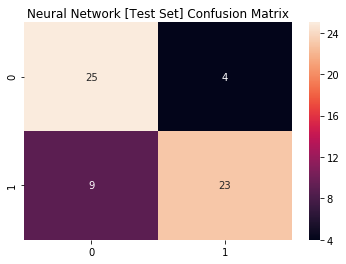

In [101]:
nn_y_true = y_test
nn_y_pred = nn.predict(X_test)
nn_matrix = confusion_matrix(nn_y_true, nn_y_pred)

plt.title("Neural Network [Test Set] Confusion Matrix", loc='center')
sns.heatmap(pd.DataFrame(nn_matrix), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True, fmt='d', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.show()

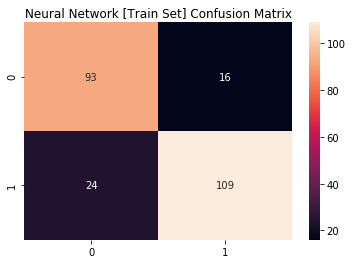

In [102]:
nn_y_true = y_train
nn_y_pred = nn.predict(X_train)
nn_matrix = confusion_matrix(nn_y_true, nn_y_pred)

plt.title("Neural Network [Train Set] Confusion Matrix", loc='center')
sns.heatmap(pd.DataFrame(nn_matrix), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True, fmt='d', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.show()

# Blend/Stacked Model Ensemble 

In [102]:
classifier_list = [
    ("knn", knn, 2),
    ("rforest", rforest, 15),
    ("dtree", dtree, 10),
    ("nn", nn, 15)]


y_validation_hat_list = []
for classifier in classifier_list:
    y_validation_hat = classifier[1].predict_proba(X_test)[:,1]
    for i in range(classifier[2]):
        y_validation_hat_list.append(y_validation_hat)
        
y_validation_hat_average = np.mean(np.array(y_validation_hat_list), axis=0)

voting_roc = roc_auc_score(y_test, y_validation_hat_average)
#voting_roc = roc_auc_score(y_test, y_validation_hat, average='macro', sample_weight=None)
print("roc:", voting_roc)
print("weight:", [classifier[2] for classifier in classifier_list])

roc: 0.9181034482758621
weight: [2, 15, 10, 15]


# Majority Class Labels (Majority/Hard Voting)

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

clf_list = [
    ("knn", knn),
    ("rforest", rforest),
    ("dtree", dtree),
    ("nn", nn)]
ensemble = VotingClassifier(estimators=clf_list, voting='hard')
for clf, label in zip([knn, rforest, dtree, nn, ensemble], ["knn", "rforest", "dtree", "nn", "ensemble"]):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.67 (+/- 0.06) [knn]
Accuracy: 0.83 (+/- 0.05) [rforest]
Accuracy: 0.73 (+/- 0.01) [dtree]
Accuracy: 0.80 (+/- 0.05) [nn]
Accuracy: 0.79 (+/- 0.04) [ensemble]
